In [6]:
from PIL import Image
import os
import numpy as np

In [7]:
import tensorflow as tf

In [8]:
data_dir = "./images/"
files = os.listdir(data_dir)

In [9]:
images = []
for file in files:
    path = os.path.join(data_dir, file)
    images.append(np.array(Image.open(path)))

# MobileNetV2 모델 로드
mobilenet_imagenet_model = tf.keras.applications.MobileNetV2(weights="imagenet")

In [10]:
resized_images = np.zeros((len(images), 224, 224, 3))
for i in range(len(images)):
    resized_images[i] = tf.image.resize(images[i], [224, 224])
preprocessed_images = tf.keras.applications.mobilenet_v2.preprocess_input(resized_images)

In [11]:
y_pred = mobilenet_imagenet_model.predict(preprocessed_images)
topK = 1
y_pred_top = tf.keras.applications.mobilenet_v2.decode_predictions(y_pred, top=topK)

1/1 [==============================] - 1s 750ms/step


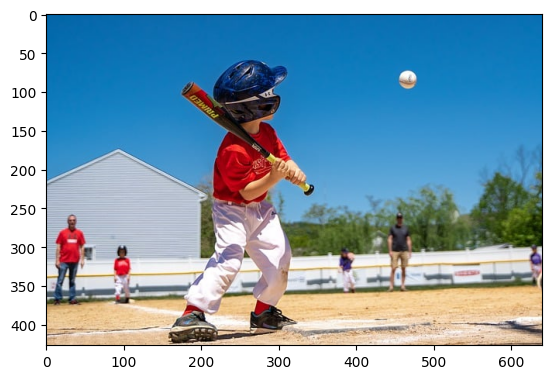

ballplayer (63.4%)


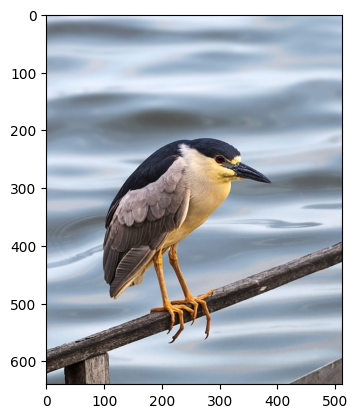

bittern (13.0%)


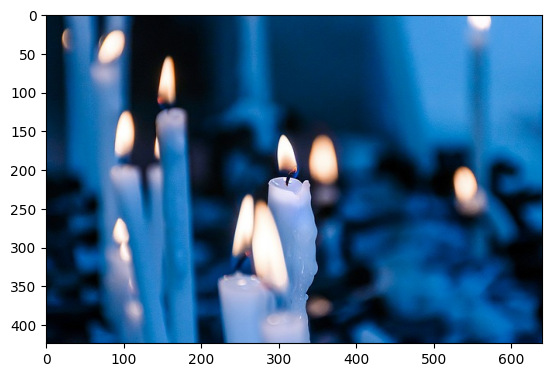

candle (97.8%)


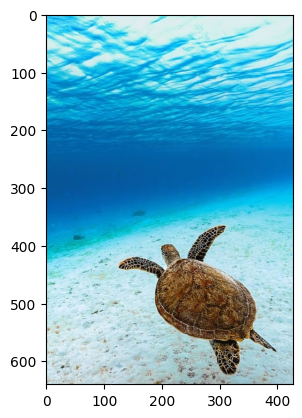

leatherback_turtle (31.8%)


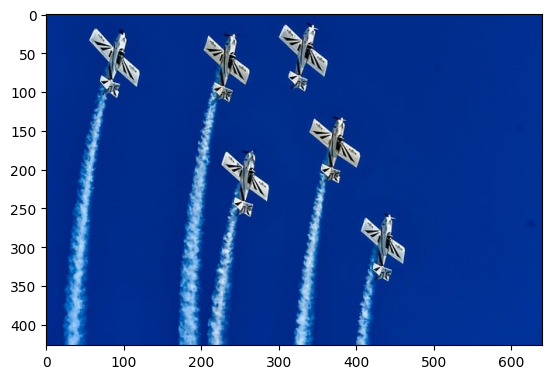

bolo_tie (14.6%)


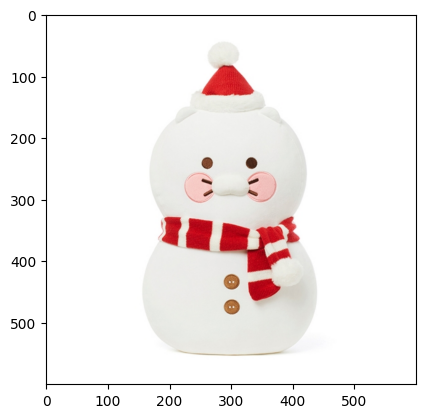

soap_dispenser (19.9%)


In [12]:
from matplotlib import pyplot as plt
import numpy as np

for i in range(len(images)):
    plt.imshow(images[i])
    plt.show()

    for k in range(topK):
        print(f'{y_pred_top[i][k][1]} ({round(y_pred_top[i][k][2]* 100,1)}%)')